In [14]:
!pip install yfinance
!pip install nsetools
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#LIST Company names listed in NSE

In [2]:
from nsetools import Nse
nse = Nse()
all_stock_codes = nse.get_stock_codes()
print("total companies",len(all_stock_codes))
print(all_stock_codes.keys())

total companies 1822
dict_keys(['SYMBOL', '20MICRONS', '21STCENMGM', '3IINFOLTD', '3MINDIA', '3PLAND', '5PAISA', '63MOONS', 'A2ZINFRA', 'AAKASH', 'AAREYDRUGS', 'AARON', 'AARTIDRUGS', 'AARTIIND', 'AARTISURF', 'AARVEEDEN', 'AARVI', 'AAVAS', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABCAPITAL', 'ABFRL', 'ABMINTLLTD', 'ABSLAMC', 'ACC', 'ACCELYA', 'ACCURACY', 'ACE', 'ACRYSIL', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ADANIPOWER', 'ADANITRANS', 'ADFFOODS', 'ADL', 'ADORWELD', 'ADROITINFO', 'ADSL', 'ADVANIHOTR', 'ADVENZYMES', 'AEGISCHEM', 'AETHER', 'AFFLE', 'AGARIND', 'AGI', 'AGRITECH', 'AGROPHOS', 'AGSTRA', 'AHLADA', 'AHLEAST', 'AHLUCONT', 'AIAENG', 'AIRAN', 'AIROLAM', 'AJANTPHARM', 'AJMERA', 'AJOONI', 'AJRINFRA', 'AKASH', 'AKG', 'AKSHAR', 'AKSHARCHEM', 'AKSHOPTFBR', 'AKZOINDIA', 'ALANKIT', 'ALBERTDAVD', 'ALEMBICLTD', 'ALICON', 'ALKALI', 'ALKEM', 'ALKYLAMINE', 'ALLCARGO', 'ALLSEC', 'ALMONDZ', 'ALOKINDS', 'ALPA', 'ALPHAGEO', 'ALPSINDUS', 'AMARAJABAT', 'AMBER', 'AMBICAAGAR', 'AMBIKCO', 'AMBUJACEM', 'AMDIND

In [ ]:
#Details of companies to be listed

In [4]:
cmp_name = "BPCL"
import yfinance as yf

cmp_name = cmp_name + ".NS"
msft = yf.Ticker(cmp_name)

# get stock info
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

sd_df = msft.history(period="max")
sd_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-02,7.106906,7.047185,6.987463,6.987463,4800,0.0,0.0
1996-01-03,6.979998,6.979998,6.979998,6.979998,2400,0.0,0.0
1996-01-04,6.979995,7.017321,6.912808,7.017321,2400,0.0,0.0
1996-01-05,7.017321,7.017321,7.017321,7.017321,0,0.0,0.0
1996-01-08,7.017324,6.942672,6.838158,6.838158,2400,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-12,322.673313,328.667859,322.132804,328.127350,2642970,0.0,0.0
2022-08-16,328.667863,341.246558,327.292043,339.919891,5360640,0.0,0.0
2022-08-17,341.590489,349.108225,341.000856,347.044525,7073400,0.0,0.0


In [5]:
#Scatter plot values

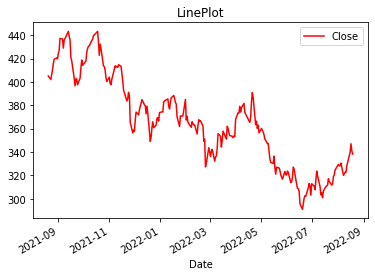

In [12]:
import matplotlib.pyplot as plt
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

sd_df = msft.history(period="1y")

sd_df.reset_index(inplace=True)

sd_df.plot(kind = 'line',
        x = 'Date',
        y = 'Close',
        color = 'red')
  
# set the title
plt.title('LinePlot')
  
# show the plot
plt.show()

In [13]:
#Support and Resistance

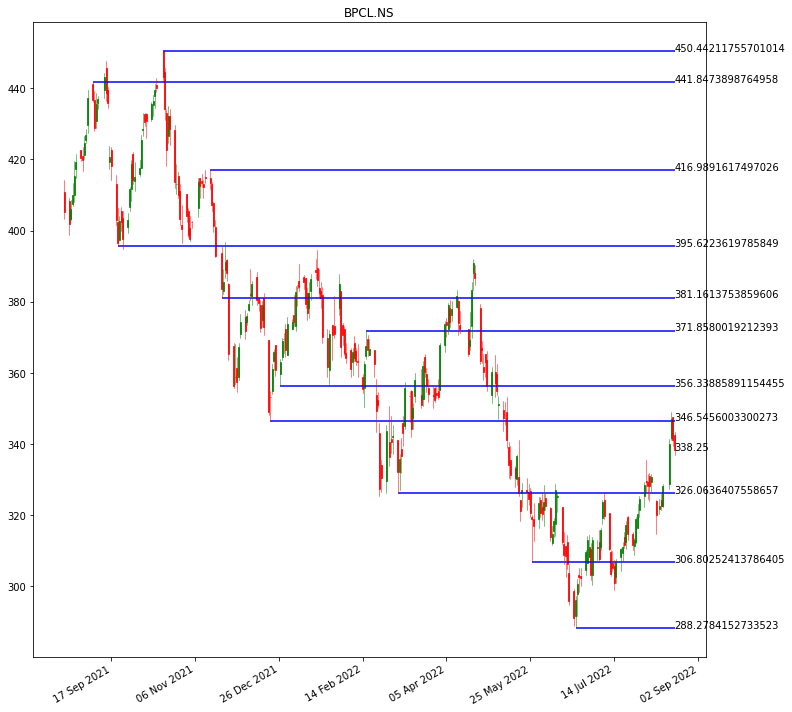

In [19]:
import numpy as np
from nsetools import Nse
from matplotlib import pyplot as plt 
from datetime import date, timedelta
from scipy.stats import linregress
import yfinance as yf
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.rcParams.update({'figure.max_open_warning': 0})

def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

def isFarFromLevel(l):
   return np.sum([abs(l-x) < s  for x in levels]) == 0


cmp_name = "BPCL"

cmp_name = cmp_name + ".NS"
msft = yf.Ticker(cmp_name)

# get stock info
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

sd_df = msft.history(period="1y")

sd_df['Date'] = pd.to_datetime(sd_df.index)
sd_df['Date'] = sd_df['Date'].apply(mpl_dates.date2num)
sd_df = sd_df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
s =  np.mean(sd_df['High'] - sd_df['Low'])


levels = []
for i in range(2,sd_df.shape[0]-2):
  if isSupport(sd_df,i):
    l = sd_df['Low'][i]
    if isFarFromLevel(l):
      levels.append((i,l))
  elif isResistance(sd_df,i):
    l = sd_df['High'][i]
    if isFarFromLevel(l):
      levels.append((i,l))

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()
plt.title(cmp_name)
candlestick_ohlc(ax,sd_df.values,width=0.6,colorup='green', colordown='red', alpha=0.8)
fig.show()
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()
#print(sd_df.iloc[-1]['Close'])
plt.text(max(sd_df['Date']),sd_df.iloc[-1]['Close'],str(sd_df.iloc[-1]['Close']))
for level in levels:
  plt.hlines(level[1],xmin=sd_df['Date'][level[0]],\
            xmax=max(sd_df['Date']),colors='blue')
  plt.text(max(sd_df['Date']),level[1],str(level[1]))
fig.show()
